In [1]:
'''
Import tunning parameters model
'''
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from NN_function_with_kFold import nn_validation
from kNN_function_with_kFold import kNN_base_function
from calculation_score import cal_score
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import StratifiedKFold

def SVM_base_fuction (X_train,y_train,X_val,y_val):
    svc_clf=SVC(C=np.exp(3),gamma=np.exp(-1),kernel="rbf",degree=len(X_train))
    svc_clf.fit(X_train,y_train['label'])
    y_pred=svc_clf.predict(X_val)
    y_pred = {"label_pred":y_pred}
    y_pred = pd.DataFrame(data=y_pred)
    Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])
    return Precall,f1_score,BER,FPR,y_pred

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
X_train=pd.read_csv("D:\\LAB\\ensemble_dataset\\X_scaled_CNN.csv")
y_train=pd.read_csv("D:\\LAB\\ensemble_dataset\\y_scaled_CNN.csv")
X_val=pd.read_csv("D:\\LAB\\lab\\task_1_version_2\\result\\scaled_validation_feature.csv")
y_val=pd.read_csv("D:\\LAB\\lab\\task_1_version_2\\result\\validation_label.csv")

In [3]:
X_val=X_val.drop('Unnamed: 0',axis=1)

In [4]:
'''
benchmark on NN
'''
y_pred_NN=nn_validation(X_train,y_train,X_val,y_val,0.498)

TPR:0.5568027210884354   f1 score:0.516430937483569   FPR:0.0863953469374418   BER:0.26479631292450323


In [7]:
'''
benchmark on Knn
'''
Precall,f1_score,BER,FPR,y_pred_kNN=kNN_base_function(X_train,y_train,X_val,y_val,17)
print("TPR "+str(Precall)+" f1_score "+str(f1_score)+" BER "+str(BER)+" FPR "+str(FPR))

TPR 0.39591836734693875 f1_score 0.4127171729110034 BER 0.33969990760693974 FPR 0.07531818256081821


In [5]:
'''
benchmark on Knn
'''
import time
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
precall_set,f1_score_set,BER_set,FPR_set=0,0,0,0
start=time.time()
for i,(train_index,test_index) in enumerate(skf.split(X_train,y_train['label'])):
    #print("the fold is ",i)
    X_train_1,X_val_1=X_train.loc[train_index],X_train.loc[test_index]
    y_train_1,y_val_1=y_train.loc[train_index],y_train.loc[test_index]
    Precall,f1_score,BER,FPR,y_pred_kNN=kNN_base_function(X_train_1,y_train_1,X_val_1,y_val_1,17)
    precall_set+=Precall
    f1_score_set+=f1_score
    BER_set+=BER
    FPR_set+=FPR
print((start-time.time())/60)
print("TPR "+str(precall_set/10)+" f1_score "+str(f1_score_set/10)+" BER "+str(BER_set/10)+" FPR "+str(FPR_set/10))

-0.20034515857696533
TPR 0.7614864260849142 f1_score 0.781463074073356 BER 0.15993728488285414 FPR 0.08136099585062241


In [10]:
'''
benchmark on svm
'''
Precall,f1_score,BER,FPR,y_pred_svm=SVM_base_fuction (X_train,y_train,X_val,y_val)
print("TPR "+str(Precall)+" f1_score "+str(f1_score)+" BER "+str(BER)+" FPR "+str(FPR))

TPR 0.38117913832199546 f1_score 0.4159346777186688 BER 0.34195572794554235 FPR 0.06509059421308021


# Bagging

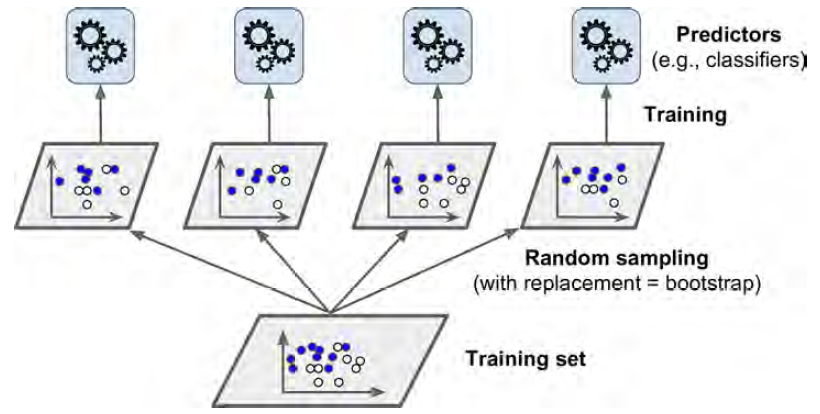

In [14]:
from IPython.display import Image
Image(filename='C:\\Users\\hasee\\workspace\\workspace\\iss-thesis\\image\\bagging.png')

Bagging anaylsis with respect to bias and Variance: $E[\frac{\sum X_{i}}{n}]=E[X_{i}]$ so bagging can not make significant reduction to bagging, but the submodels of bagging is independent, so $Var[\frac{\sum X_{i}}{n}]=Var[\frac{X_{i}}{n}]$

In [ ]:
y_pred_NN=np.array(y_pred_NN)
y_pred_kNN=np.array(y_pred_kNN)
y_pred_svm=np.array(y_pred_svm)
num_samples=y_pred_NN.shape[0]

In [28]:
# start bagging  SVM classifiers
bag_clf = BaggingClassifier(
    SVC(C=np.exp(3),gamma=np.exp(-1),kernel="rbf",degree=len(X_train)), n_estimators=100,
    max_samples=200, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train['label'])
y_pred = bag_clf.predict(X_val)
y_pred = {"label_pred":y_pred}
y_pred = pd.DataFrame(data=y_pred)
Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])
print("TPR "+str(Precall)+" f1_score "+str(f1_score)+" BER "+str(BER)+" FPR "+str(FPR))

TPR 0.3625850340136054 f1_score 0.3952784129534639 BER 0.3527150311494539 FPR 0.06801509631251328


In [8]:
# start bagging and cross validation on kNN and SVM classifiers
import time
precall_mat=np.zeros((15,1))
ber_mat=np.zeros((15,1))
f1_score_mat=np.zeros((15,1))
fpr_mat=np.zeros((15,1))
start=time.time()
for index_1,N_ESTIMATORS in enumerate([1,10,20,30,40,50,60,70,80,90,100,200,500,1000]):
    for index_2,MAX_SAMPLES in enumerate([40000]):
        print("n_estimator",N_ESTIMATORS)
        print("max_samples",MAX_SAMPLES)
        skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
        skf.get_n_splits(X_train,y_train['label'])
        bag_clf = BaggingClassifier(
            KNeighborsClassifier(n_neighbors=17,algorithm='auto',weights ='distance'), n_estimators=N_ESTIMATORS,
            max_samples=MAX_SAMPLES, bootstrap=True, n_jobs=-1, random_state=42)
        precall_set,f1_score_set,BER_set,FPR_set=0,0,0,0
        for i,(train_index,test_index) in enumerate(skf.split(X_train,y_train['label'])):
            #print("the fold is ",i)
            X_train_1,X_val_1=X_train.loc[train_index],X_train.loc[test_index]
            y_train_1,y_val_1=y_train['label'].loc[train_index],y_train['label'].loc[test_index]
            bag_clf.fit(X_train_1, y_train_1)
            y_pred = bag_clf.predict(X_val_1)
            y_pred = {"label_pred":y_pred}
            y_pred = pd.DataFrame(data=y_pred)
            Precall,f1_score,BER,FPR= cal_score(y_pred,y_val_1)
            precall_set+=Precall
            f1_score_set+=f1_score
            BER_set+=BER
            FPR_set+=FPR
        precall_mat[index_1,index_2]=precall_set/10
        f1_score_mat[index_1,index_2]=f1_score_set/10
        ber_mat[index_1,index_2]=BER_set/10
        fpr_mat[index_1,index_2]=FPR_set/10
        print("%5.1f minute"%((start-time.time())/60))
        print("TPR "+str(precall_set/10)+" f1_score "+str(f1_score_set/10)+" BER "+str(BER_set/10)+" FPR "+str(FPR_set/10))

n_estimator 1
max_samples 40000
 -0.1 minute
TPR 0.7551792327045347 f1_score 0.7704470317506733 BER 0.16695810149005624 FPR 0.0890954356846473
n_estimator 10
max_samples 40000
 -1.2 minute
TPR 0.7645059824085987 f1_score 0.7815262438731736 BER 0.15941505858823177 FPR 0.08333609958506225
n_estimator 20
max_samples 40000
 -2.5 minute
TPR 0.764047237598436 f1_score 0.7809921945756801 BER 0.15977721107630066 FPR 0.08360165975103734
n_estimator 30
max_samples 40000
 -4.2 minute
TPR 0.7643149969792898 f1_score 0.7812087822934848 BER 0.15961843512031365 FPR 0.083551867219917
n_estimator 40
max_samples 40000
 -6.2 minute
TPR 0.7655763188000358 f1_score 0.7819831376717555 BER 0.15899607296512722 FPR 0.08356846473029048
n_estimator 50
max_samples 40000
 -8.6 minute
TPR 0.7655763334069523 f1_score 0.7821184371620117 BER 0.15892137686498864 FPR 0.08341908713692946
n_estimator 60
max_samples 40000
-11.3 minute
TPR 0.7651941142307589 f1_score 0.7820348875097038 BER 0.15902949890121806 FPR 0.08325311

In [10]:
40000/86411*

0.4629040284223073

In [12]:
len(X_val)*0.4629040284223073

32415.780398328916

In [13]:
# start bagging on kNN and SVM classifiers over validation set
import time
precall_mat=np.zeros((15,1))
ber_mat=np.zeros((15,1))
f1_score_mat=np.zeros((15,1))
fpr_mat=np.zeros((15,1))
start=time.time()
for index_1,N_ESTIMATORS in enumerate([1,10,20,30,40,50,60,70,80,90,100,200,500,1000]):
    for index_2,MAX_SAMPLES in enumerate([32415]):
        print("n_estimator",N_ESTIMATORS)
        print("max_samples",MAX_SAMPLES)
        bag_clf = BaggingClassifier(
            KNeighborsClassifier(n_neighbors=17,algorithm='auto',weights ='distance'), n_estimators=N_ESTIMATORS,
            max_samples=MAX_SAMPLES, bootstrap=True, n_jobs=-1, random_state=42)
        bag_clf.fit(X_train,y_train['label'])
        y_pred=bag_clf.predict(X_val)
        Precall,f1_score,BER,FPR= cal_score(y_pred,y_val['label'])
        print("%5.1f minute"%((start-time.time())/60))
        print("TPR "+str(Precall)+" f1_score "+str(f1_score)+" BER "+str(BER)+" FPR "+str(FPR))

n_estimator 1
max_samples 32415
 -0.1 minute
TPR 0.39807256235827665 f1_score 0.4099480413334112 BER 0.34015858215348704 FPR 0.07838972666525071
n_estimator 10
max_samples 32415
 -0.5 minute
TPR 0.39512471655328796 f1_score 0.41671648929809874 BER 0.33855279195127114 FPR 0.07223030045583022
n_estimator 20
max_samples 32415
 -1.1 minute
TPR 0.39988662131519276 f1_score 0.4213859020310633 BER 0.33594310756254187 FPR 0.07177283644027643
n_estimator 30
max_samples 32415
 -2.0 minute
TPR 0.3934240362811791 f1_score 0.4164166566662667 BER 0.339035527074827 FPR 0.07149509043083307
n_estimator 40
max_samples 32415
 -3.2 minute
TPR 0.3926303854875283 f1_score 0.41597597597597596 BER 0.33935883146915263 FPR 0.07134804842583364
n_estimator 50
max_samples 32415
 -4.6 minute
TPR 0.3937641723356009 f1_score 0.41685170737562266 BER 0.3388164450459496 FPR 0.07139706242750012
n_estimator 60
max_samples 32415
 -6.4 minute
TPR 0.3937641723356009 f1_score 0.4162771185424908 BER 0.33900433205233776 FPR 0.0

KeyboardInterrupt: 

# 2. Stacking

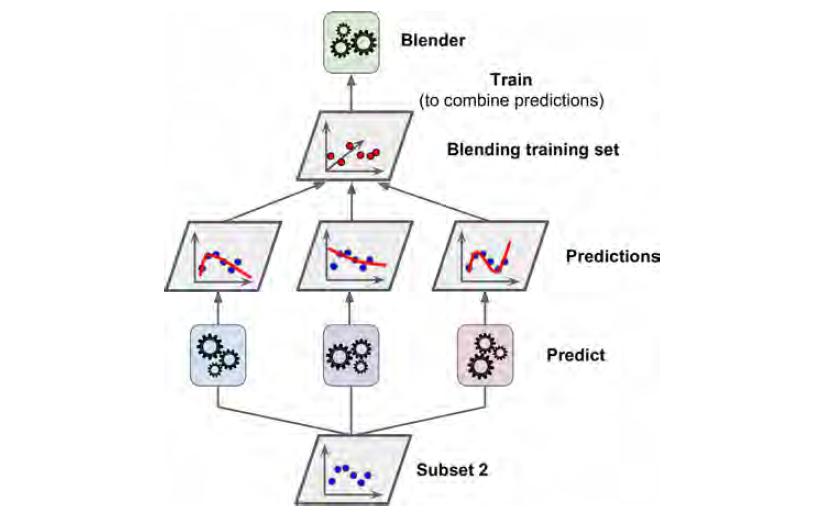

In [15]:
from IPython.display import Image
Image(filename='C:\\Users\\hasee\\workspace\\workspace\\iss-thesis\\image\\stacking.png')

In [25]:
'''
first stacking : voting
'''
y_new_pred=np.zeros((num_samples))

for index in range(num_samples):
    sum_value=y_pred_NN[index]+y_pred_kNN[index]+y_pred_svm[index]
    if sum_value <= 4.0:
        y_new_pred[index]=1.0
    else:
        y_new_pred[index]=2.0
        
Precall,f1_score,BER,FPR= cal_score(y_new_pred,y_val['label'])
print("TPR "+str(Precall)+" f1_score "+str(f1_score)+" BER "+str(BER)+" FPR "+str(FPR))

TPR 0.4072562358276644 f1_score 0.43642549055342933 BER 0.3294481642107614 FPR 0.06615256424918718


In [4]:
'''
construct 2 layer of model
'''
'''
first layer is the NN, kNN, SVM, second layer is logistic regression
'''
X_new_train_NN=[]
X_new_test_NN=[]
X_new_train_kNN=[]
X_new_test_kNN=[]
X_new_train_svm=[]
X_new_test_svm=[]
kf=KFold(n_splits=5,random_state=42)
print("layer 1 start")
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    print('now is the fold',i)
    X_train_1,X_val_1=X_train.loc[train_index],X_train.loc[test_index]
    y_train_1,y_val_1=y_train.loc[train_index],y_train.loc[test_index]
    y_pred_NN=nn_validation(X_train_1,y_train_1,X_val_1,y_val_1,0.498)
    X_new_train_NN.append(y_pred_NN)
    _,_,_,_,y_pred_kNN=kNN_base_function(X_train_1,y_train_1,X_val_1,y_val_1,17)
    X_new_train_kNN.append(y_pred_kNN)
    _,_,_,_,y_pred_svm=SVM_base_fuction (X_train_1,y_train_1,X_val_1,y_val_1)
    X_new_train_svm.append(y_pred_svm)
    y_pred_NN=nn_validation(X_train_1,y_train_1,X_val,y_val,0.498)
    X_new_test_NN.append(y_pred_NN)
    _,_,_,_,y_pred_kNN=kNN_base_function(X_train_1,y_train_1,X_val,y_val,17)
    X_new_test_kNN.append(y_pred_kNN)
    _,_,_,_,y_pred_svm=SVM_base_fuction (X_train_1,y_train_1,X_val,y_val)
    X_new_test_svm.append(y_pred_svm)
    
    

layer 1 start
now is the fold 0
TPR:0.7736422331940752   f1 score:0.7244598559615898   FPR:0.1586918532079554   BER:0.1925248100069401
TPR:0.553968253968254   f1 score:0.5153736617267022   FPR:0.08585619291911056   BER:0.2659439694754283
now is the fold 1
TPR:0.791737729770703   f1 score:0.7311865593279664   FPR:0.16433449941695819   BER:0.18629838482312755
TPR:0.5569160997732426   f1 score:0.5160476965908494   FPR:0.08667309294688516   BER:0.2648784965868213
now is the fold 2
TPR:0.788955396794748   f1 score:0.7286669638876505   FPR:0.1611170784103115   BER:0.18608084080778176
TPR:0.5598639455782313   f1 score:0.5176643254009854   FPR:0.08691816295521754   BER:0.26352710868849316
now is the fold 3
TPR:0.7876514714368148   f1 score:0.7298814722395508   FPR:0.15948026152445585   BER:0.18591439504382054
TPR:0.5571428571428572   f1 score:0.5168822972546545   FPR:0.08626464293299786   BER:0.26456089289507034
now is the fold 4
TPR:0.7969853081473002   f1 score:0.7345467334916029   FPR:0.162

In [72]:
'''
generate training set and testing set for layer 2
'''
X_train_NN=np.concatenate(X_new_train_NN)
X_train_kNN=np.concatenate(X_new_train_kNN).ravel()
X_train_svm=np.concatenate(X_new_train_svm).ravel()
X_test_NN=np.array((X_new_test_NN[0]+X_new_test_NN[1]+X_new_test_NN[2]+X_new_test_NN[3]+X_new_test_NN[4])/5).ravel()
X_test_kNN=np.array((X_new_test_kNN[0]+X_new_test_kNN[1]+X_new_test_kNN[2]+X_new_test_kNN[3]+X_new_test_kNN[4])/5).ravel()
X_test_svm=np.array((X_new_test_svm[0]+X_new_test_svm[1]+X_new_test_svm[2]+X_new_test_svm[3]+X_new_test_svm[4])/5).ravel()

new_train=pd.DataFrame({'feature1':X_train_NN,'feature2':X_train_kNN,'feature3':X_train_svm}) # matrix: len(train_set)*3
new_test=pd.DataFrame({'feature1':X_test_NN,'feature2':X_test_kNN,'feature3':X_test_svm}) # matrix: len(test_set)*3

In [73]:
'''
second layer using logistic regression
'''
log_clf=LogisticRegression(random_state=42)
log_clf.fit(new_train,y_train['label'])
y_stack_pred=log_clf.predict(new_test)

In [74]:
Precall,f1_score,BER,FPR= cal_score(y_stack_pred,y_val['label'])
print("TPR "+str(Precall)+" f1_score "+str(f1_score)+" BER "+str(BER)+" FPR "+str(FPR))

TPR 0.3701814058956916 f1_score 0.41405110646122634 BER 0.34502023207592597 FPR 0.060221870047543584


In [105]:
'''
Second layer using XGBClassifier
'''
xgb_clf=XGBClassifier(learning_rate=0.1,min_child_weight=1,max_depth=9)
xgb_clf.fit(new_train,y_train['label'])
y_xgb_pred=xgb_clf.predict(new_test)

In [106]:
Precall,f1_score,BER,FPR= cal_score(y_xgb_pred,y_val['label'])
print("TPR "+str(Precall)+" f1_score "+str(f1_score)+" BER "+str(BER)+" FPR "+str(FPR))

TPR 0.3630385487528345 f1_score 0.3900596905835059 BER 0.3543916508445542 FPR 0.07182185044194292
